Capstone project code of Data Science in Python IBM Course. 
Planning a bike trip in New York City using Foursquare and Machine Learning.

Libraries and data import.

In [436]:
#import libraries
import json
import requests

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans

import folium
from geopy.geocoders import Nominatim

import matplotlib.cm as cm
import matplotlib.colors as colors

In [437]:
# Find stations list
url='https://feeds.citibikenyc.com/stations/stations.json'
r = requests.get(url)
station_data=r.json()
station_list=station_data['stationBeanList']
station_list

[{'id': 72,
  'stationName': 'W 52 St & 11 Ave',
  'availableDocks': 25,
  'totalDocks': 39,
  'latitude': 40.76727216,
  'longitude': -73.99392888,
  'statusValue': 'In Service',
  'statusKey': 1,
  'availableBikes': 13,
  'stAddress1': 'W 52 St & 11 Ave',
  'stAddress2': '',
  'city': '',
  'postalCode': '',
  'location': '',
  'altitude': '',
  'testStation': False,
  'lastCommunicationTime': '2018-11-03 12:02:43 AM',
  'landMark': ''},
 {'id': 79,
  'stationName': 'Franklin St & W Broadway',
  'availableDocks': 32,
  'totalDocks': 33,
  'latitude': 40.71911552,
  'longitude': -74.00666661,
  'statusValue': 'In Service',
  'statusKey': 1,
  'availableBikes': 1,
  'stAddress1': 'Franklin St & W Broadway',
  'stAddress2': '',
  'city': '',
  'postalCode': '',
  'location': '',
  'altitude': '',
  'testStation': False,
  'lastCommunicationTime': '2018-11-03 12:03:35 AM',
  'landMark': ''},
 {'id': 82,
  'stationName': 'St James Pl & Pearl St',
  'availableDocks': 21,
  'totalDocks': 27

In [438]:
# define the dataframe columns
column_names = ['Station Name', 'Id','Latitude', 'Longitude', 'Address'] 

# instantiate the dataframe
stations_df = pd.DataFrame(columns=column_names)

for station in station_list:
    station_name=station['stationName']
    station_id=station['id']
    station_lat=station['latitude']
    station_lng=station['longitude']
    station_addr=station['stAddress1']
    
    stations_df=stations_df.append({'Station Name': station_name,
                                   'Id': station_id,
                                   'Latitude': station_lat,
                                   'Longitude': station_lng,
                                   'Address': station_addr}, ignore_index=True)
stations_df.head()

,Station Name,Id,Latitude,Longitude,Address
0,W 52 St & 11 Ave,72,40.767272,-73.993929,W 52 St & 11 Ave
1,Franklin St & W Broadway,79,40.719116,-74.006667,Franklin St & W Broadway
2,St James Pl & Pearl St,82,40.711174,-74.000165,St James Pl & Pearl St
3,Atlantic Ave & Fort Greene Pl,83,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl
4,Park Ave & St Edwards St,119,40.696089,-73.978034,Park Ave & St Edwards St


In [439]:
print('The City Bike network of New York City has {} stations.'.format(stations_df.shape[0]))

The City Bike network of New York City has 815 stations.


In [440]:
# Find New York City coordinates and plot map with stations
address = 'New York City, NY'
geolocator = Nominatim()
location = geolocator.geocode(address)
NY_lat = location.latitude
NY_lng = location.longitude

c:\users\silvia\appdata\local\programs\python\python36\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [441]:
# create map of Citi Bike stations in New York using latitude and longitude values
map_newyork = folium.Map(location=[NY_lat, NY_lng], zoom_start=12)

# add markers to map
for lat, lng, station,ID in zip(stations_df['Latitude'], stations_df['Longitude'], stations_df['Station Name'], stations_df['Id']):
    label = '{},{}'.format(station,id)
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_newyork)  
    
map_newyork

In [442]:
# The spreadsheet of July 2018 is chosen
# Read spreadsheet of July's bike trips
df_july=pd.read_csv('201807-citibike-tripdata.csv')

In [443]:
# Some info about the dataframe
print('There were {} bike trips in the month of July 2018.'.format(df_july.shape[0]),'\n')
df_july.info()

There were 1913625 bike trips in the month of July 2018. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913625 entries, 0 to 1913624
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(4), int64(6), object(5)
memory usage: 219.0+ MB


In [444]:
df_july.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,500,2018-07-01 00:33:51.2640,2018-07-01 00:42:12.0280,72,W 52 St & 11 Ave,40.767272,-73.993929,3236,W 42 St & Dyer Ave,40.758985,-73.993800,16583,Subscriber,1981,1
1,455,2018-07-01 02:06:54.0270,2018-07-01 02:14:29.0900,72,W 52 St & 11 Ave,40.767272,-73.993929,529,W 42 St & 8 Ave,40.757570,-73.990985,31481,Subscriber,1988,1
2,1080,2018-07-01 02:09:16.4640,2018-07-01 02:27:17.0290,72,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,25004,Subscriber,1982,2
3,632,2018-07-01 02:55:04.5870,2018-07-01 03:05:36.7910,72,W 52 St & 11 Ave,40.767272,-73.993929,465,Broadway & W 41 St,40.755136,-73.986580,25867,Subscriber,1986,1
4,1676,2018-07-01 03:24:27.4350,2018-07-01 03:52:23.7760,72,W 52 St & 11 Ave,40.767272,-73.993929,3425,2 Ave & E 104 St,40.789210,-73.943708,31351,Subscriber,1992,1


In [503]:
#Choose a start station and create dataframe with data relative to it
start_name='Clinton Ave & Flushing Ave'
start_df=df_july[df_july['start station name']==start_name]
start_id=stations_df[stations_df['Station Name']==start_name].reset_index(drop=True).loc[0,'Id']
start_lat=stations_df[stations_df['Station Name']==start_name].reset_index(drop=True).loc[0,'Latitude']
start_lng=stations_df[stations_df['Station Name']==start_name].reset_index(drop=True).loc[0,'Longitude']
print('{} trips started from {} in July 2018'.format(start_df.shape[0],start_name))
print('The station ID is {}'.format(start_id))
print('The station latitude is {}'.format(start_lat))
print('The station longitude is {} '.format(start_lng))
# Remove columns that won't be used
dropped_columns=['starttime','stoptime','start station id','start station name','start station latitude','start station longitude','bikeid','gender']
start_df=start_df.drop(columns=dropped_columns,axis=1).reset_index(drop=True)
start_df.rename(columns={'tripduration': 'trip duration','usertype':'user type'},inplace=True)
start_df.head()


887 trips started from Clinton Ave & Flushing Ave in July 2018
The station ID is 343
The station latitude is 40.69794
The station longitude is -73.96986848 


,trip duration,end station id,end station name,end station latitude,end station longitude,user type,birth year
0,1964,217,Old Fulton St,40.702772,-73.993836,Customer,1969
1,1962,217,Old Fulton St,40.702772,-73.993836,Customer,1969
2,1868,217,Old Fulton St,40.702772,-73.993836,Customer,1969
3,1243,322,Clinton St & Tillary St,40.696192,-73.991218,Customer,1969
4,1227,322,Clinton St & Tillary St,40.696192,-73.991218,Customer,1969


In [504]:
# remove trips that end at the same starting point
start_df=start_df[start_df['end station name']!=start_name]
start_df.shape[0]

859

Data wrangling 

In [505]:
#check if there are missing entries
start_df.isnull().sum()

trip duration            0
end station id           0
end station name         0
end station latitude     0
end station longitude    0
user type                0
birth year               0
dtype: int64

In [506]:
# convert trip duration from seconds to minutes
# convert categorical variable "user type"
start_df['trip duration']=round(start_df['trip duration']/60)

dummy_var=pd.get_dummies(start_df['user type'])
start_df=pd.concat([start_df,dummy_var],axis=1)
start_df.drop(['user type'],axis=1,inplace=True)

In [507]:
start_df.head()

,trip duration,end station id,end station name,end station latitude,end station longitude,birth year,Customer,Subscriber
0,33.0,217,Old Fulton St,40.702772,-73.993836,1969,1,0
1,33.0,217,Old Fulton St,40.702772,-73.993836,1969,1,0
2,31.0,217,Old Fulton St,40.702772,-73.993836,1969,1,0
3,21.0,322,Clinton St & Tillary St,40.696192,-73.991218,1969,1,0
4,20.0,322,Clinton St & Tillary St,40.696192,-73.991218,1969,1,0


Some data analysis

In [508]:
nogeo_df=start_df[['trip duration','end station id','birth year','Customer','Subscriber']]
#nogeo_df.head()
nogeo_df.describe()

,trip duration,end station id,birth year,Customer,Subscriber
count,859.000000,859.000000,859.000000,859.000000,859.000000
mean,19.423749,1643.098952,1979.195576,0.335274,0.664726
std,33.761845,1455.012382,10.864129,0.472361,0.472361
min,1.000000,83.000000,1947.000000,0.000000,0.000000
25%,10.000000,324.000000,1969.000000,0.000000,0.000000
50%,15.000000,471.000000,1980.000000,0.000000,1.000000
75%,23.000000,3242.000000,1990.000000,1.000000,1.000000
max,675.000000,3693.000000,1999.000000,1.000000,1.000000


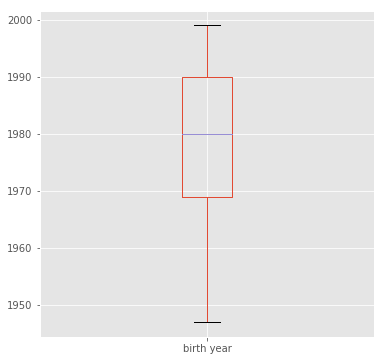

In [509]:
birthyear_df=start_df[['birth year']]
birthyear_df.plot(kind='box',figsize=(6,6))

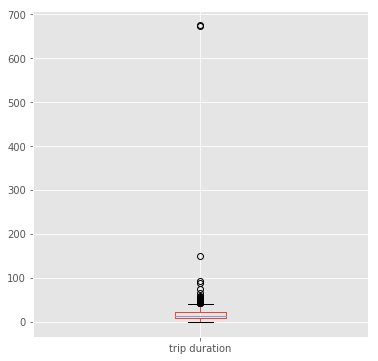

In [510]:
duration_df=start_df[['trip duration']]
duration_df.plot(kind='box',figsize=(6,6))

In [511]:
nogeo_df.corr()

,trip duration,end station id,birth year,Customer,Subscriber
trip duration,1.000000,-0.027923,-0.101596,0.179999,-0.179999
end station id,-0.027923,1.000000,-0.041256,-0.034056,0.034056
birth year,-0.101596,-0.041256,1.000000,-0.402747,0.402747
Customer,0.179999,-0.034056,-0.402747,1.000000,-1.000000
Subscriber,-0.179999,0.034056,0.402747,-1.000000,1.000000


No significant correlation between the selected columns is observed.
Duration distribution has many outliers.
Birth year distribution has low standard deviation.

Find most travalled to stations, create dataframe

In [512]:
# create dataframe of end stations of the trips starting from the selected start 
end_df=start_df[['end station id','end station name','end station latitude','end station longitude','trip duration']]
# group by end station
end_grouped_df=end_df.groupby(['end station id','end station name','end station latitude','end station longitude'],sort=False).count().reset_index()
end_df.head()

,end station id,end station name,end station latitude,end station longitude,trip duration
0,217,Old Fulton St,40.702772,-73.993836,33.0
1,217,Old Fulton St,40.702772,-73.993836,33.0
2,217,Old Fulton St,40.702772,-73.993836,31.0
3,322,Clinton St & Tillary St,40.696192,-73.991218,21.0
4,322,Clinton St & Tillary St,40.696192,-73.991218,20.0


In [513]:
end_grouped_df.head()

,end station id,end station name,end station latitude,end station longitude,trip duration
0,217,Old Fulton St,40.702772,-73.993836,28
1,322,Clinton St & Tillary St,40.696192,-73.991218,6
2,2000,Front St & Washington St,40.702551,-73.989402,37
3,414,Pearl St & Anchorage Pl,40.702819,-73.987658,27
4,278,Concord St & Bridge St,40.697666,-73.984764,2


In [514]:
print('{} stations were the destinations of trips starting from {} in July 2018'.format(end_grouped_df.shape[0],start_name))

195 stations were the destinations of trips starting from Clinton Ave & Flushing Ave in July 2018


In [515]:
# create map of end stations using latitude and longitude values
end_stations_map = folium.Map(location=[NY_lat, NY_lng], zoom_start=12)

# add markers to map
for lat, lng, station in zip(end_grouped_df['end station latitude'], end_grouped_df['end station longitude'], end_grouped_df['end station name']):
    label = '{}'.format(station)
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(end_stations_map)  
folium.CircleMarker(
    [start_lat,start_lng],
    radius=5,
    popup=start_name,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.7).add_to(end_stations_map)  
end_stations_map

In [529]:
# most traveled to stations, at least 10 trips
# choose to consider frequent trips, assuming the user wants to use the bike for commuting, shopping, not just recreation
top_stations_df=end_grouped_df[end_grouped_df['trip duration']>=5].reset_index(drop=True).drop(['trip duration'],axis=1)
top_stations_df

,end station id,end station name,end station latitude,end station longitude
0,217,Old Fulton St,40.702772,-73.993836
1,322,Clinton St & Tillary St,40.696192,-73.991218
2,2000,Front St & Washington St,40.702551,-73.989402
3,414,Pearl St & Anchorage Pl,40.702819,-73.987658
4,418,Front St & Gold St,40.702240,-73.982578
5,274,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682
6,239,Willoughby St & Fleet St,40.691966,-73.981302
7,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013
8,321,Cadman Plaza E & Red Cross Pl,40.699918,-73.989718
9,3057,Kosciuszko St & Tompkins Ave,40.691283,-73.945242


Explore end stations' neighborhoods with Foursquare

In [530]:
# @hidden_cell
# credentials and version used to make calls to Foursquare API
CLIENT_ID = 'MJYGRGYWV3VGYP0NYNW1SAYGOOPQECONLMYVLJ3NEOLL0BFQ' 
CLIENT_SECRET = 'P4WNI3HTO02FXFKOBKKNPVTJFKWDLM21V13HG41QG5CW1IET' 
VERSION = '20180605' # Foursquare API version

In [531]:
# parameters used in calls to Foursquare
radius=200
LIMIT=100

In [532]:
# Function to find venues around a destination
def getNearbyVenues(names, latitudes, longitudes, radius=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# call the function to find the venues around the trips' end stations
st_names=top_stations_df['end station name']
st_lats=top_stations_df['end station latitude']
st_lngs=top_stations_df['end station longitude']
end_stations_venues=getNearbyVenues(names=st_names,latitudes=st_lats,longitudes=st_lngs)

print('{} venues were found around the {} most travelled to stations. {} of these venue are unique'.format(
    end_stations_venues.shape[0], 
    top_stations_df.shape[0],
    len(end_stations_venues['Venue Category'].unique())))


Old Fulton St
Clinton St & Tillary St
Front St & Washington St
Pearl St & Anchorage Pl
Front St & Gold St
Lafayette Ave & Fort Greene Pl
Willoughby St & Fleet St
DeKalb Ave & Hudson Ave
Cadman Plaza E & Red Cross Pl
Kosciuszko St & Tompkins Ave
Brooklyn Bridge Park - Pier 2
Jay St & York St
Milton St & Franklin St
Grand St & Havemeyer St
FDR Drive & E 35 St
McKibbin St & Manhattan Ave
Metropolitan Ave & Bedford Ave
Centre St & Chambers St
Atlantic Ave & Furman St
S 4 St & Wythe Ave
Broadway & Berry St
S 3 St & Bedford Ave
Nassau St & Navy St
Bergen St & Vanderbilt Ave
Bergen St & Smith St
Kent Ave & N 7 St
Fulton St & Adams St
Clark St & Henry St
Division St & Bowery
Kent Ave & S 11 St
Clinton Ave & Myrtle Ave
Plaza St West & Flatbush Ave
Duffield St & Willoughby St
Henry St & Poplar St
Forsyth St & Canal St
Grand Army Plaza & Plaza St West
Hanson Pl & Ashland Pl
Congress St & Clinton St
Jay St & Tech Pl
Clermont Ave & Park Ave
Bedford Ave & S 9 St
Wythe Ave & Metropolitan Ave
971 venu

In [533]:
# one hot encoding
venues_onehot = pd.get_dummies(end_stations_venues[['Venue Category']], prefix="", prefix_sep="")
# add station name column back to dataframe
venues_onehot['Station'] = end_stations_venues['Station'] 
# move station name column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]
venues_onehot[['Station Latitude','Station Longitude']] = end_stations_venues[['Station Latitude','Station Longitude']]  
#confirm that the number of rows is same as number of venues and number of columns is same as number of unique venues+3
print('The number of venues is {}, the number of unique venues is {}.'.format(
    venues_onehot.shape[0],venues_onehot.shape[1]-3)) 
venues_grouped = venues_onehot.groupby('Station').mean().reset_index()
#confirm the number of rows is same as number of stations and number of columns is same as number of unique venues+3      
print('The number of stations is {}, the number of unique venues is {}.'.format(
    venues_grouped.shape[0],venues_grouped.shape[1]-3)) 
#venues_onehot.head()
venues_grouped.head()

The number of venues is 971, the number of unique venues is 213.
The number of stations is 42, the number of unique venues is 213.


,Station,Accessories Store,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Station Latitude,Station Longitude
0,Atlantic Ave & Furman St,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,40.691652,-73.999979
1,Bedford Ave & S 9 St,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,40.708531,-73.964090
2,Bergen St & Smith St,0.0,0.000000,0.0,0.0,0.0,0.0,0.031250,0.03125,0.000000,...,0.0,0.031250,0.0,0.000000,0.0,0.000000,0.0,0.000000,40.686744,-73.990632
3,Bergen St & Vanderbilt Ave,0.0,0.028571,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.028571,0.0,0.028571,0.0,0.028571,40.679439,-73.968044
4,Broadway & Berry St,0.0,0.037037,0.0,0.0,0.0,0.0,0.037037,0.00000,0.037037,...,0.0,0.037037,0.0,0.000000,0.0,0.037037,0.0,0.000000,40.710446,-73.965251


In [535]:
# Find 10 most common venues for each station
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues=10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe with no latitude, longitude columns
venues_common=venues_grouped.drop(['Station Latitude','Station Longitude'], axis= 1)
stations_venues_sorted = pd.DataFrame(columns=columns)
stations_venues_sorted['Station'] = venues_common['Station']

for ind in np.arange(venues_common.shape[0]):
    stations_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_common.iloc[ind, :], num_top_venues)

stations_venues_sorted

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Atlantic Ave & Furman St,Playground,Dog Run,Sporting Goods Shop,Middle Eastern Restaurant,Pet Service,Park,Café,Dive Bar,Farm,Falafel Restaurant
1,Bedford Ave & S 9 St,Music Venue,Yoga Studio,Flower Shop,Fish Market,Farmers Market,Farm,Falafel Restaurant,Factory,Event Space,Ethiopian Restaurant
2,Bergen St & Smith St,Bakery,Bar,Gift Shop,Italian Restaurant,Juice Bar,Clothing Store,Sporting Goods Shop,Dive Bar,Coffee Shop,German Restaurant
3,Bergen St & Vanderbilt Ave,Ice Cream Shop,Mexican Restaurant,Yoga Studio,Pie Shop,Southern / Soul Food Restaurant,Seafood Restaurant,Breakfast Spot,Sandwich Place,Restaurant,Ramen Restaurant
4,Broadway & Berry St,Café,Nightclub,Jazz Club,Pet Store,Gourmet Shop,Salon / Barbershop,Brazilian Restaurant,Mediterranean Restaurant,Music Venue,Bistro
5,Brooklyn Bridge Park - Pier 2,Park,Bike Rental / Bike Share,Burger Joint,Juice Bar,Scenic Lookout,Roller Rink,Yoga Studio,Dog Run,Farm,Falafel Restaurant
6,Cadman Plaza E & Red Cross Pl,Yoga Studio,Coffee Shop,New American Restaurant,Bar,Park,Boxing Gym,Italian Restaurant,Design Studio,English Restaurant,Fish Market
7,Centre St & Chambers St,Plaza,Museum,Gift Shop,Bookstore,Park,Dessert Shop,Coffee Shop,College Theater,Dance Studio,Falafel Restaurant
8,Clark St & Henry St,Deli / Bodega,Chinese Restaurant,Diner,Coffee Shop,Falafel Restaurant,Asian Restaurant,Sushi Restaurant,Bar,Ramen Restaurant,Gym
9,Clermont Ave & Park Ave,Mexican Restaurant,Coffee Shop,Bike Rental / Bike Share,Thai Restaurant,Trail,Auto Workshop,Chinese Restaurant,Motorcycle Shop,Electronics Store,Fish Market


In [536]:
# set number of clusters
kclusters = 5
stations_grouped_clustering = venues_grouped.drop(['Station', 'Station Latitude','Station Longitude'], axis= 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(stations_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_

# add cluster's labels 
clustersdf=stations_venues_sorted
clustersdf['Cluster label'] = kmeans.labels_
clustersdf

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
0,Atlantic Ave & Furman St,Playground,Dog Run,Sporting Goods Shop,Middle Eastern Restaurant,Pet Service,Park,Café,Dive Bar,Farm,Falafel Restaurant,1
1,Bedford Ave & S 9 St,Music Venue,Yoga Studio,Flower Shop,Fish Market,Farmers Market,Farm,Falafel Restaurant,Factory,Event Space,Ethiopian Restaurant,0
2,Bergen St & Smith St,Bakery,Bar,Gift Shop,Italian Restaurant,Juice Bar,Clothing Store,Sporting Goods Shop,Dive Bar,Coffee Shop,German Restaurant,1
3,Bergen St & Vanderbilt Ave,Ice Cream Shop,Mexican Restaurant,Yoga Studio,Pie Shop,Southern / Soul Food Restaurant,Seafood Restaurant,Breakfast Spot,Sandwich Place,Restaurant,Ramen Restaurant,1
4,Broadway & Berry St,Café,Nightclub,Jazz Club,Pet Store,Gourmet Shop,Salon / Barbershop,Brazilian Restaurant,Mediterranean Restaurant,Music Venue,Bistro,1
5,Brooklyn Bridge Park - Pier 2,Park,Bike Rental / Bike Share,Burger Joint,Juice Bar,Scenic Lookout,Roller Rink,Yoga Studio,Dog Run,Farm,Falafel Restaurant,4
6,Cadman Plaza E & Red Cross Pl,Yoga Studio,Coffee Shop,New American Restaurant,Bar,Park,Boxing Gym,Italian Restaurant,Design Studio,English Restaurant,Fish Market,1
7,Centre St & Chambers St,Plaza,Museum,Gift Shop,Bookstore,Park,Dessert Shop,Coffee Shop,College Theater,Dance Studio,Falafel Restaurant,1
8,Clark St & Henry St,Deli / Bodega,Chinese Restaurant,Diner,Coffee Shop,Falafel Restaurant,Asian Restaurant,Sushi Restaurant,Bar,Ramen Restaurant,Gym,1
9,Clermont Ave & Park Ave,Mexican Restaurant,Coffee Shop,Bike Rental / Bike Share,Thai Restaurant,Trail,Auto Workshop,Chinese Restaurant,Motorcycle Shop,Electronics Store,Fish Market,1


In [537]:
map_cols=['Station','Latitude','Longitude','Cluster']
mapdf=pd.DataFrame(columns=map_cols)
mapdf[['Station','Latitude','Longitude']]=venues_grouped[['Station', 'Station Latitude','Station Longitude']]
mapdf['Cluster']=clustersdf['Cluster label']

# create map
map_clusters = folium.Map(location=[NY_lat, NY_lng], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mapdf['Latitude'], mapdf['Longitude'], mapdf['Station'], mapdf['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [538]:
cl0=clustersdf[clustersdf['Cluster label']==0]
cl0

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
1,Bedford Ave & S 9 St,Music Venue,Yoga Studio,Flower Shop,Fish Market,Farmers Market,Farm,Falafel Restaurant,Factory,Event Space,Ethiopian Restaurant,0


In [539]:
cl1=clustersdf[clustersdf['Cluster label']==1]
cl1

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
0,Atlantic Ave & Furman St,Playground,Dog Run,Sporting Goods Shop,Middle Eastern Restaurant,Pet Service,Park,Café,Dive Bar,Farm,Falafel Restaurant,1
2,Bergen St & Smith St,Bakery,Bar,Gift Shop,Italian Restaurant,Juice Bar,Clothing Store,Sporting Goods Shop,Dive Bar,Coffee Shop,German Restaurant,1
3,Bergen St & Vanderbilt Ave,Ice Cream Shop,Mexican Restaurant,Yoga Studio,Pie Shop,Southern / Soul Food Restaurant,Seafood Restaurant,Breakfast Spot,Sandwich Place,Restaurant,Ramen Restaurant,1
4,Broadway & Berry St,Café,Nightclub,Jazz Club,Pet Store,Gourmet Shop,Salon / Barbershop,Brazilian Restaurant,Mediterranean Restaurant,Music Venue,Bistro,1
6,Cadman Plaza E & Red Cross Pl,Yoga Studio,Coffee Shop,New American Restaurant,Bar,Park,Boxing Gym,Italian Restaurant,Design Studio,English Restaurant,Fish Market,1
7,Centre St & Chambers St,Plaza,Museum,Gift Shop,Bookstore,Park,Dessert Shop,Coffee Shop,College Theater,Dance Studio,Falafel Restaurant,1
8,Clark St & Henry St,Deli / Bodega,Chinese Restaurant,Diner,Coffee Shop,Falafel Restaurant,Asian Restaurant,Sushi Restaurant,Bar,Ramen Restaurant,Gym,1
9,Clermont Ave & Park Ave,Mexican Restaurant,Coffee Shop,Bike Rental / Bike Share,Thai Restaurant,Trail,Auto Workshop,Chinese Restaurant,Motorcycle Shop,Electronics Store,Fish Market,1
10,Clinton Ave & Myrtle Ave,Restaurant,Thai Restaurant,Italian Restaurant,Gourmet Shop,Pub,Pet Store,Optical Shop,Mexican Restaurant,Juice Bar,Yoga Studio,1
12,Congress St & Clinton St,Boutique,Yoga Studio,Kids Store,Cosmetics Shop,Playground,Deli / Bodega,Cocktail Bar,Falafel Restaurant,Fish Market,Flower Shop,1


In [540]:
cl2=clustersdf[clustersdf['Cluster label']==2]
cl2

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
11,Clinton St & Tillary St,Plaza,Japanese Restaurant,Park,Diner,Deli / Bodega,Bar,History Museum,Falafel Restaurant,Farm,Dog Run,2


In [541]:
cl3=clustersdf[clustersdf['Cluster label']==3]
cl3

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
21,Grand Army Plaza & Plaza St West,Plaza,Food Truck,Farmers Market,Public Art,Taco Place,Bed & Breakfast,Dog Run,Farm,Falafel Restaurant,Factory,3


In [542]:
cl4=clustersdf[clustersdf['Cluster label']==4]
cl4

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
5,Brooklyn Bridge Park - Pier 2,Park,Bike Rental / Bike Share,Burger Joint,Juice Bar,Scenic Lookout,Roller Rink,Yoga Studio,Dog Run,Farm,Falafel Restaurant,4
29,Kosciuszko St & Tompkins Ave,Park,Pizza Place,Moving Target,Deli / Bodega,Juice Bar,Dive Bar,Farm,Falafel Restaurant,Factory,Event Space,4
